In [2]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [31]:
importlib.reload(EyeTraumaAnalysis);

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

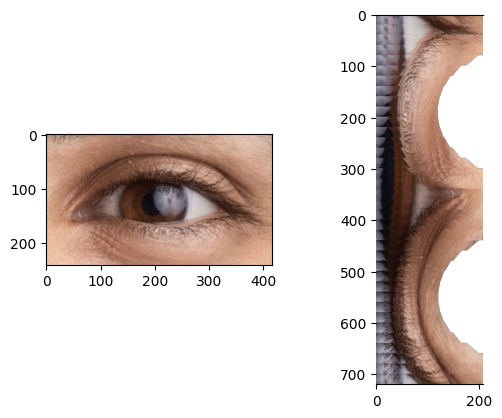

In [5]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")

interval_deg = 10
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=interval_deg,
    wd_px=20,
    center=image.center, borderValue=(0,0,0,0) )
concatenated = np.vstack([segment for ind,segment in segments.items()])

fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(concatenated);
axs[1].spines["left"].set_visible(False)
axs[1].spines["right"].set_visible(False)

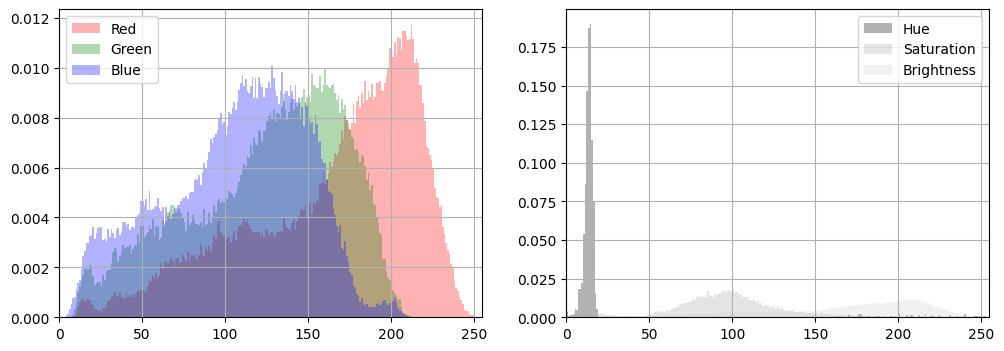

In [6]:
img_rgb = image.img
img_hsv = mpl.colors.rgb_to_hsv(image.img[...,:3]/255.0) * 255

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12,4))
axs[0].hist(img_rgb[...,0].ravel(),256,[0,256],density=True, alpha=.3, facecolor="red", label="Red");
axs[0].hist(img_rgb[...,1].ravel(),256,[0,256],density=True, alpha=.3, facecolor="green", label="Green");
axs[0].hist(img_rgb[...,2].ravel(),256,[0,256],density=True, alpha=.3, facecolor="blue", label="Blue");
axs[0].grid()
axs[0].set_xlim([0, 255]);
axs[0].legend();

axs[1].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, alpha=.3, facecolor="black", label="Hue");
axs[1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, alpha=.3, facecolor="darkgray", label="Saturation");
axs[1].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, alpha=.3, facecolor="lightgray", label="Brightness");
axs[1].grid()
axs[1].set_xlim([0, 255]);
axs[1].legend();


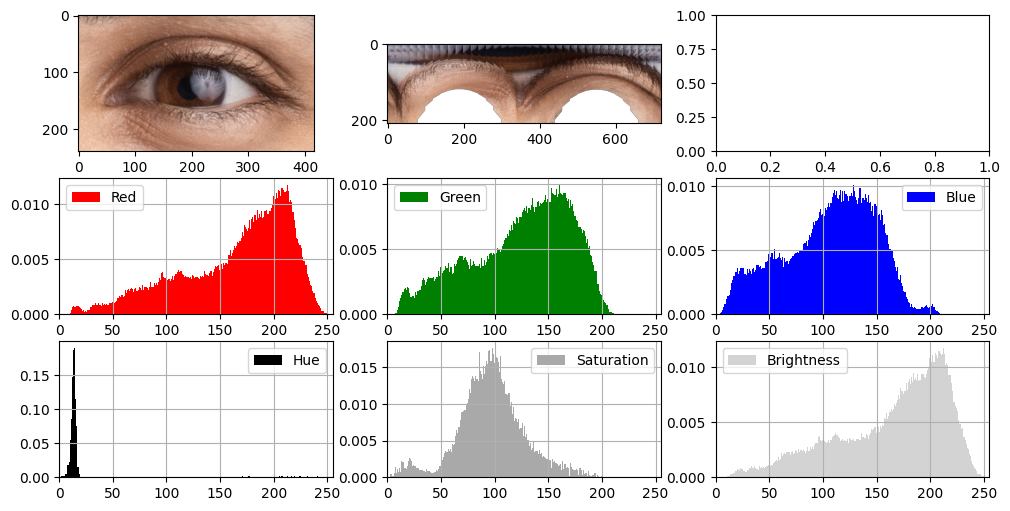

In [7]:
img_hsv = mpl.colors.rgb_to_hsv(image.img[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, figsize=(12,6))

axs[0,0].imshow(image.img)

axs[0,1].imshow(np.transpose(concatenated, axes=[1,0,2]))

axs[1,0].hist(image.img[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red");
axs[1,1].hist(image.img[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green");
axs[1,2].hist(image.img[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue");

axs[2,0].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, facecolor="black", label="Hue");
axs[2,1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation");
axs[2,2].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, facecolor="lightgray", label="Brightness");

for ind, ax in enumerate(axs[1:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

#plt.hist(img_hsv[...,0].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="red", label="H");
#plt.hist(img_hsv[...,1].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="green");



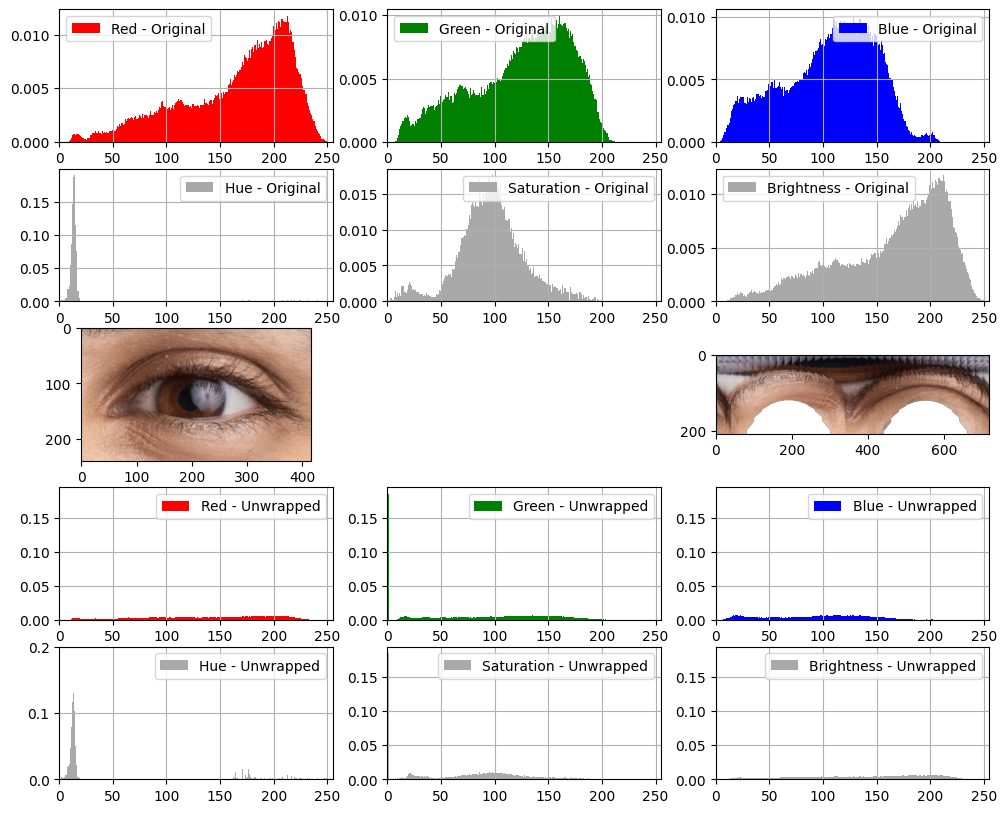

In [8]:
img_rgb1 = image.img
img_hsv1 = mpl.colors.rgb_to_hsv(img_rgb1[...,:3]/255.0) * 255

fig, axs = plt.subplots(5, 3, figsize=(12,10))

"""fig = plt.figure()
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((3, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
ax4 = plt.subplot2grid((3, 2), (2, 0), colspan=2)"""

axs[0,0].hist(img_rgb1[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red - Original");
axs[0,1].hist(img_rgb1[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green - Original");
axs[0,2].hist(img_rgb1[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue - Original");

axs[1,0].hist(img_hsv1[...,0].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Hue - Original");
axs[1,1].hist(img_hsv1[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation - Original");
axs[1,2].hist(img_hsv1[...,2].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Brightness - Original");

for ind, ax in enumerate(axs[:2,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

axs[2,0].imshow(image.img)
axs[2,1].axis("off")
axs[2,2].imshow(np.transpose(concatenated, axes=[1,0,2]))

img_rgb2 = np.vstack([segment for ind,segment in segments.items()])
img_hsv2 = mpl.colors.rgb_to_hsv(img_rgb2[...,:3]/255.0) * 255

axs[3,0].hist(img_rgb2[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red - Unwrapped");
axs[3,1].hist(img_rgb2[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green - Unwrapped");
axs[3,2].hist(img_rgb2[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue - Unwrapped");

axs[4,0].hist(img_hsv2[...,0].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Hue - Unwrapped");
axs[4,1].hist(img_hsv2[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation - Unwrapped");
axs[4,2].hist(img_hsv2[...,2].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Brightness - Unwrapped");

for ind, ax in enumerate(axs[3:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()


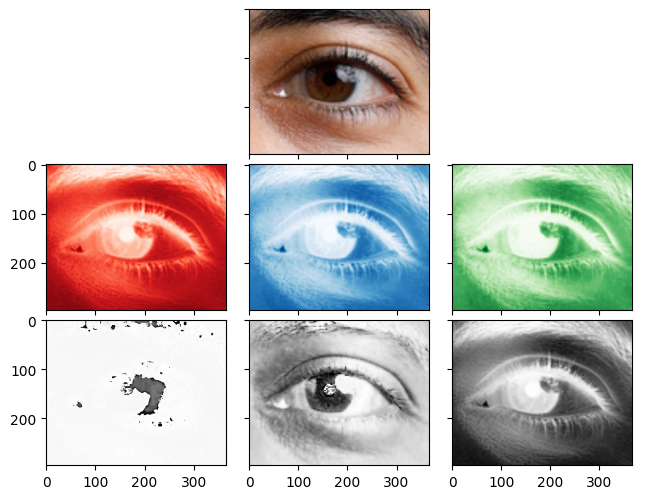

In [9]:
image = EyeTraumaAnalysis.Image("data/01_raw/11004.jpg")
img_rgb1 = image.img
img_hsv1 = mpl.colors.rgb_to_hsv(img_rgb1[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
axs[0,0].axis("off")
axs[0,1].imshow(img_rgb1)
axs[0,2].axis("off")

axs[1,0].imshow(img_rgb1[...,0], vmin=0, vmax=255, cmap="Reds");
axs[1,1].imshow(img_rgb1[...,1], vmin=0, vmax=255, cmap="Blues");
axs[1,2].imshow(img_rgb1[...,2], vmin=0, vmax=255, cmap="Greens");
axs[2,0].imshow(img_hsv1[...,0], vmin=0, vmax=255, cmap="Greys");
axs[2,1].imshow(img_hsv1[...,1], vmin=0, vmax=255, cmap="Greys");
axs[2,2].imshow(img_hsv1[...,2], vmin=0, vmax=255, cmap="Greys");

fig.tight_layout(pad=0)

In [10]:
import os
os.getcwd()

'C:\\Users\\ethan\\PycharmProjects\\EyeTraumaAnalysis'

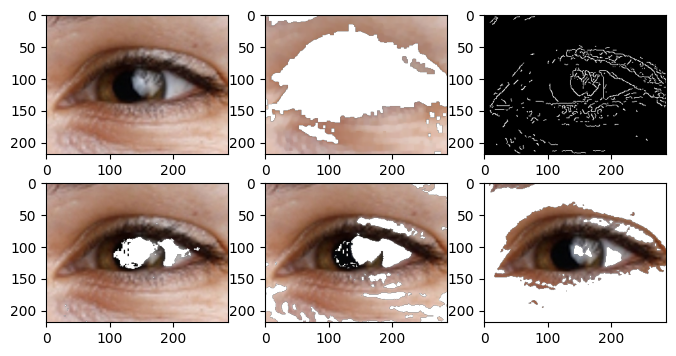

In [11]:

image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")

img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)
frame_threshold1 = cv2.inRange(img_hsv, (0, 0, 0), (30, 255,255))
target1 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold1)

frame_threshold2 = cv2.inRange(img_hsv, (0, 50, 0), (255, 255,255))
target2 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold2)

frame_threshold3 = cv2.inRange(img_hsv, (0, 0, 00), (255, 255,160))
target3 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold3)

fig, axs = plt.subplots(2, 3, figsize=(8,4))
axs[0,0].imshow(image.img)

axs[1,0].imshow(target1);
axs[1,1].imshow(target2);
axs[1,2].imshow(target3);

ht, wd, ch = img_hsv.shape;
bottom_region_hsv = img_hsv[int(ht*9/10):,:,:3]  # :3 removes alpha channel
percentiles = np.quantile(bottom_region_hsv,[0.01, 0.99], axis=[0,1])    #
frame_threshold = cv2.inRange(img_hsv, percentiles[0], percentiles[1])

target4 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold)
kernel = np.ones((int(wd/50),int(ht/50)),np.uint8)
target4 = cv2.morphologyEx(target4, cv2.MORPH_OPEN, kernel)
target4 = cv2.morphologyEx(target4, cv2.MORPH_CLOSE, kernel)
axs[0,1].imshow(target4);
#axs[0,2].imshow(cv2.cvtColor(bottom_region_hsv, cv2.COLOR_HSV2RGB));
axs[0,2].imshow(cv2.Canny(image.img, threshold1=90, threshold2=100), cmap="gray");


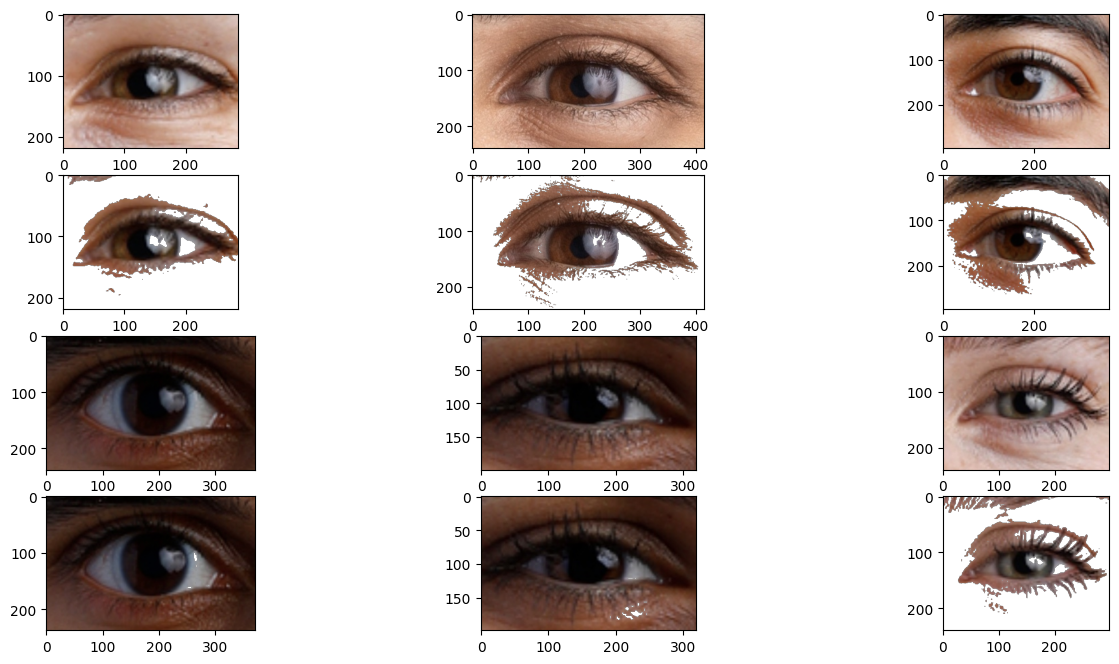

In [12]:
image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")
im2 = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
im3 = EyeTraumaAnalysis.Image("data/01_raw/11004.jpg")
im4 = EyeTraumaAnalysis.Image("data/01_raw/11011.jpg")
im5 = EyeTraumaAnalysis.Image("data/01_raw/11009.jpg")
im6 = EyeTraumaAnalysis.Image("data/01_raw/11002.jpg")

tgt1 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold3)

ft_tgt2 = cv2.inRange(cv2.cvtColor(im2.img[...,:3], cv2.COLOR_RGB2HSV), (0, 0, 00), (255, 255,160))
tgt2 = cv2.bitwise_and(im2.img,im2.img, mask=ft_tgt2)

ft_tgt3 = cv2.inRange(cv2.cvtColor(im3.img[...,:3], cv2.COLOR_RGB2HSV), (0, 0, 00), (255, 255,160))
tgt3 = cv2.bitwise_and(im3.img,im3.img, mask=ft_tgt3)

ft_tgt4 = cv2.inRange(cv2.cvtColor(im4.img[...,:3], cv2.COLOR_RGB2HSV), (0, 0, 00), (255, 255,160))
tgt4 = cv2.bitwise_and(im4.img,im4.img, mask=ft_tgt4)

ft_tgt5 = cv2.inRange(cv2.cvtColor(im5.img[...,:3], cv2.COLOR_RGB2HSV), (0, 0, 00), (255, 255,160))
tgt5 = cv2.bitwise_and(im5.img,im5.img, mask=ft_tgt5)

ft_tgt6 = cv2.inRange(cv2.cvtColor(im6.img[...,:3], cv2.COLOR_RGB2HSV), (0, 0, 00), (255, 255,160))
tgt6 = cv2.bitwise_and(im6.img,im6.img, mask=ft_tgt6)

fig, axs = plt.subplots(4, 3, figsize=(16,8))

axs[0,0].imshow(image.img)
axs[0,1].imshow(im2.img)
axs[0,2].imshow(im3.img)

axs[1,0].imshow(tgt1)
axs[1,1].imshow(tgt2)
axs[1,2].imshow(tgt3)

axs[2,0].imshow(im4.img)
axs[2,1].imshow(im5.img)
axs[2,2].imshow(im6.img)

axs[3,0].imshow(tgt4)
axs[3,1].imshow(tgt5)
axs[3,2].imshow(tgt6)

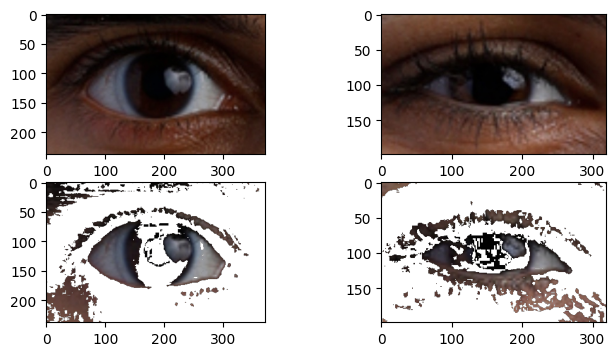

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(8,4))

axs[0,0].imshow(im4.img)
axs[0,1].imshow(im5.img)

axs[1,0].imshow(
    cv2.bitwise_and(im4.img,im4.img,
                    mask=cv2.inRange(cv2.cvtColor(im4.img[...,:3], cv2.COLOR_RGB2HSV), (0, 0, 0), (255, 110, 160)))
)

axs[1,1].imshow(
    cv2.bitwise_and(im5.img,im5.img,
                    mask=cv2.inRange(cv2.cvtColor(im5.img[...,:3], cv2.COLOR_RGB2HSV), (0, 0, 0), (255, 110, 160)))
)

In [14]:
def convolve(B, r):
    D = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(r,r))
    cv2.filter2D(B, -1, D, B)
    B = np.uint8(B)
    cv2.normalize(B, B, 0, 255, cv2.NORM_MINMAX)
    return B

In [15]:
im4_hsv = cv2.cvtColor(im4.img, cv2.COLOR_BGR2HSV)

im4_hsv.shape

(238, 372, 3)

In [16]:
model_hsv = im4_hsv[200:238, 0:70]

#Get the model histogram M and Normalise it
M = cv2.calcHist([model_hsv], channels=[0, 1], mask=None,
                  histSize=[180, 256], ranges=[0, 180, 0, 256] )
M = cv2.normalize(M, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

#Backprojection of our original image using the model histogram M
B = cv2.calcBackProject([im4_hsv.img], channels=[0,1], hist=M,
                         ranges=[0,180,0,256], scale=1)

#Now we can use the function convolve(B, r) we created previously
B = convolve(B, r=5)

#Threshold to clean the image and merging to three-channels
_, thresh = cv2.threshold(B, 50, 255, 0)
B_thresh = cv2.merge((thresh, thresh, thresh))

#Using B_tresh as a mask for a binary AND with the original image
#cv2.imwrite('result.jpg', cv2.bitwise_and(image, B_thresh))
cv2.imshow(cv2.bitwise_and(image, B_thresh))

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'normalize'
> Overload resolution failed:
>  - normalize() missing required argument 'dst' (pos 2)
>  - normalize() missing required argument 'dst' (pos 2)


In [22]:
def show_image_seg_approaches(image, plot_region_boundaries=False):
    ## https://mpatacchiola.github.io/blog/2016/12/01/playing-the-google-chrome-dinosaur-game-with-your-hand.html
    img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)
    ht, wd, ch = img_hsv.shape;
    center = (int(wd/2),int(ht/2));
    bottom_region_cutoff = int(ht*95/100)
    kernel = np.ones((int(wd/50),int(ht/50)),np.uint8)

    # get bottom region as ground truth for skin
    region_hsv1 = img_hsv[bottom_region_cutoff:,:,:3]  # :3 removes alpha channel
    percentiles1 = np.quantile(region_hsv1,[0.01, 0.99], axis=[0,1])

    ### MASK OUT SKIN
    M = cv2.calcHist([region_hsv1], channels=[0, 1], mask=None, histSize=[180, 256], ranges=[0, 180, 0, 256] )
    M = cv2.normalize(M, M, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    #Backprojection of our original image using the model histogram M
    B = cv2.calcBackProject([img_hsv], channels=[0,1], hist=M, ranges=[0,180,0,256], scale=1)
    #Now we can use the function convolve(B, r) we created previously
    B = convolve(B, r=5)
    #Threshold to clean the image and merging to three-channels
    _, thresh = cv2.threshold(B, 50, 255, 0)
    B_thresh = cv2.merge((thresh, thresh, thresh))
    target = cv2.bitwise_and(image, B_thresh)

    # skin_threshold = cv2.inRange(img_hsv, percentiles1[0], percentiles1[1])
    # target1 = cv2.bitwise_and(image.img,image.img, mask=~skin_threshold)
    # st_m = cv2.morphologyEx(skin_threshold, cv2.MORPH_CLOSE, kernel) # Erosion then Dilation
    # st_m = cv2.morphologyEx(st_m, cv2.MORPH_OPEN, kernel) # Dilation then Erosion
    # target2 = cv2.bitwise_and(image.img,image.img, mask=~st_m)

    # pupil histogram data
    # center_region_mask = np.zeros(img_hsv.shape[:2]);
    # center_region_mask = cv2.circle(center_region_mask, center, int(ht/14), 255, -1)
    # center_region_hsv = img_hsv.reshape( (-1,ch) )[center_region_mask.flatten().astype(bool),:] # flatten circle array
    # percentiles2 = np.quantile(center_region_hsv,[0.01, 0.99], axis=[0])
    #
    # ### MASK OUT PUPIL
    # pupil_threshold = cv2.inRange(img_hsv, percentiles2[0], percentiles2[1])
    # # target1 = cv2.bitwise_and(image.img,image.img, mask=~pupil_threshold)
    # target1 = cv2.bitwise_and(target1, target1, mask=~pupil_threshold)
    # pt_m = cv2.morphologyEx(pupil_threshold, cv2.MORPH_CLOSE, kernel) # Erosion then Dilation
    # pt_m = cv2.morphologyEx(pt_m, cv2.MORPH_OPEN, kernel) # Dilation then Erosion
    # #target2 = cv2.bitwise_and(image.img,image.img, mask=~pt_m)
    # target2 = cv2.bitwise_and(target2, target2, mask=~pt_m)

    fig, axs = plt.subplots(1, 2, figsize=(10,4))
    axs[0].imshow(image.img);
    axs[0].set_title("Original");
    axs[1].imshow(target);
    axs[1].set_title("With Mask");
    # axs[2].imshow(target2);
    # axs[2].set_title("With Dilation/Erosion");
    fig.suptitle("OpenCV Histogramming w Backprojecct");


image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")
show_image_seg_approaches(image, plot_region_boundaries=False)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'bitwise_and'
> Overload resolution failed:
>  - src1 is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src1'


In [21]:
from deepgaze.color_detection import MultiBackProjectionColorDetector

img = image.img
#Creating a python list and appending the model-templates
#In this case the list are preprocessed images but you
#can take subframes from the original image
template_list=list()
template_list.append(cv2.imread('model_1.jpg')) #Load the image
template_list.append(cv2.imread('model_2.jpg')) #Load the image
template_list.append(cv2.imread('model_3.jpg')) #Load the image
template_list.append(cv2.imread('model_4.jpg')) #Load the image
template_list.append(cv2.imread('model_5.jpg')) #Load the image

#Defining the deepgaze color detector object
my_back_detector = MultiBackProjectionColorDetector()
my_back_detector.setTemplateList(template_list) #Set the template

#Return the image filterd, it applies the backprojection,
#the convolution and the mask all at once
img_filtered = my_back_detector.returnFiltered(img,
                                               morph_opening=True, blur=True,
                                               kernel_size=3, iterations=2)
# cv2.imwrite("result.jpg", img_filtered)
plt.imshow(img_filtered)

ModuleNotFoundError: No module named 'deepgaze'

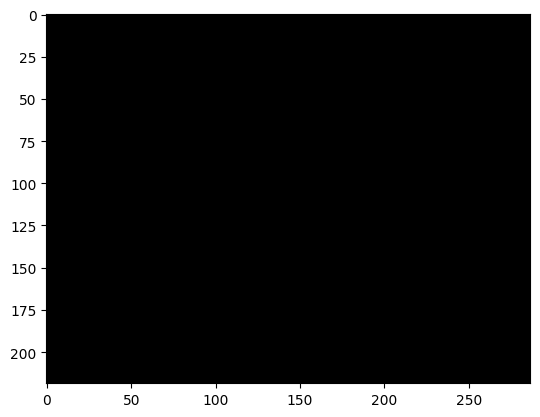

In [27]:
# parameters
# image_filtered = my_back_detector.returnFiltered(image, morph_opening=True, blur=True, kernel_size=7, iterations=2)
morph_opening = False
blur = False
kernel_size = 7
iterations = 2

image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")
img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)

ht, wd, ch = img_hsv.shape
bottom_region_cutoff = int(ht*95/100)
region_hsv1 = img_hsv[bottom_region_cutoff:,:,:3]

#Convert the input framge from BGR -> HSV
frame_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2HSV)
#Set the template histogram
template_hist = cv2.calcHist([region_hsv1],[0, 1], None, [180, 256], [0, 180, 0, 256] )
#Normalize the template histogram and apply backprojection
cv2.normalize(template_hist, template_hist, 0, 255, cv2.NORM_MINMAX)
frame_hsv = cv2.calcBackProject([frame_hsv], [0,1], template_hist, [0,180,0,256], 1)
#Get the kernel and apply a convolution
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size,kernel_size))
# frame_hsv = cv2.filter2D(frame_hsv, -1, kernel)
# #Applying the morph open operation (erosion followed by dilation)
# if(morph_opening==True):
#     kernel = np.ones((kernel_size,kernel_size), np.uint8)
#     frame_hsv = cv2.morphologyEx(frame_hsv, cv2.MORPH_OPEN, kernel, iterations=iterations)
# #Applying Gaussian Blur
# if(blur==True):
#     frame_hsv = cv2.GaussianBlur(frame_hsv, (kernel_size,kernel_size), 0)
#Get the threshold
ret, frame_threshold = cv2.threshold(frame_hsv, 50, 255, 0)
#Merge the threshold matrices
frame_threshold = cv2.merge((frame_threshold,frame_threshold,frame_threshold))

image_filtered = cv2.bitwise_and(img_hsv, frame_threshold)

plt.imshow(image_filtered)

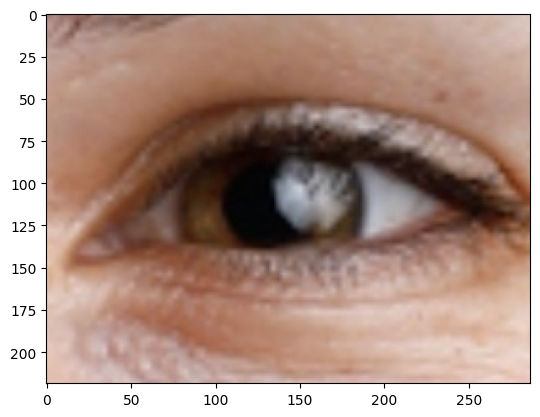

In [34]:
image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")
plt.imshow(image.img)

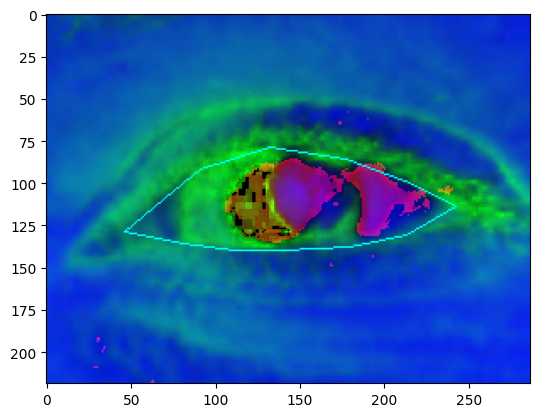

In [40]:
image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")
img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)

points = [
    [46,129],
    [70,109],
    [91,92],
    [132,79],
    [177,86],
    [212,99],
    [242,114],
    [213,131],
    [179,138],
    [140,140],
    [111,140],
    [81,136]
]

pts = np.array([points], np.int32)
pts = pts.reshape((-1,1,2))
img_polygon = cv2.polylines(img_hsv,[pts],True,(0,255,255))

plt.imshow(img_polygon)

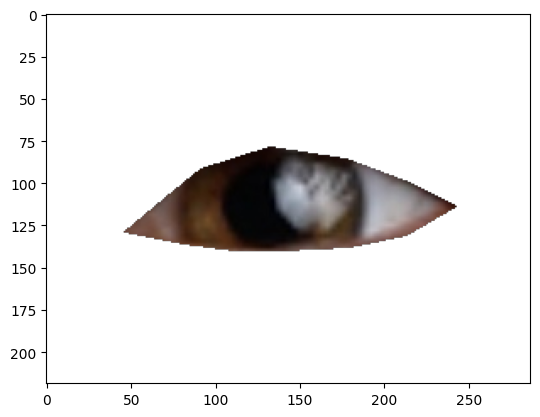

In [42]:
# original image
# -1 loads as-is so if it will be 3 or 4 channel as the original
image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")
# img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)
# mask defaulting to black for 3-channel and transparent for 4-channel
# (of course replace corners with yours)
mask = np.zeros(image.img.shape, dtype=np.uint8)
roi_corners = np.array([points], dtype=np.int32)
# fill the ROI so it doesn't get wiped out when the mask is applied
channel_count = image.img.shape[2]  # i.e. 3 or 4 depending on your image
ignore_mask_color = (255,)*channel_count
cv2.fillPoly(mask, roi_corners, ignore_mask_color)
# from Masterfool: use cv2.fillConvexPoly if you know it's convex

# apply the mask
masked_image = cv2.bitwise_and(image.img, mask)

plt.imshow(masked_image)